本示例源于scikit-learn官方文档，为label propagation在MNIST数据集上的表现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn.semi_supervised import label_propagation
from sklearn.metrics import classification_report,confusion_matrix

# 再加下面这个，不然会报错
from scipy.sparse.csgraph import *

### 1. 载入并观察数据

In [2]:
digits = datasets.load_digits()
rng = np.random.RandomState(0)
indices = np.arange(len(digits.data))
rng.shuffle(indices)

In [3]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

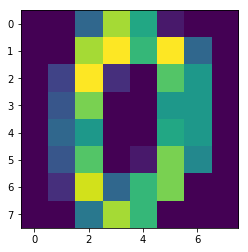

In [7]:
plt.imshow(digits.images[0])

In [8]:
digits.data[0]    # 相当于把image进行了ravel

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
# 所有的label种类
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:
X = digits.data[indices[:330]]
y = digits.target[indices[:330]]
images = digits.images[indices[:330]]
n_total_samples = len(y)
n_labeled_points = 30
indices = np.arange(n_total_samples)
unlabeled_set = indices[n_labeled_points:]

y_train = np.copy(y)
y_train[unlabeled_set] = -1

### 2. 利用LabelSpreading进行学习

In [12]:
lp_model = label_propagation.LabelSpreading(gamma=0.25, max_iter=5)
lp_model.fit(X, y_train)
predicted_labels = lp_model.transduction_[unlabeled_set]
true_labels = y[unlabeled_set]
cm = confusion_matrix(true_labels, predicted_labels, labels=lp_model.classes_)

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/semi_supervised/label_propagation.py:292: ConvergenceWarning: max_iter=5 was reached without convergence.
  category=ConvergenceWarning


In [13]:
print("Label Spreading model: %d labeled & %d unlabeled points (%d total)" %
      (n_labeled_points, n_total_samples - n_labeled_points, n_total_samples))

print(classification_report(true_labels, predicted_labels))

print("Confusion matrix")
print(cm)

Label Spreading model: 30 labeled & 300 unlabeled points (330 total)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       0.58      0.50      0.54        28
           2       0.93      0.93      0.93        29
           3       0.00      0.00      0.00        28
           4       0.92      0.88      0.90        25
           5       0.96      0.76      0.85        33
           6       0.97      0.97      0.97        36
           7       0.89      1.00      0.94        34
           8       0.51      0.79      0.62        29
           9       0.51      0.80      0.62        35

   micro avg       0.77      0.77      0.77       300
   macro avg       0.73      0.76      0.74       300
weighted avg       0.73      0.77      0.74       300

Confusion matrix
[[23  0  0  0  0  0  0  0  0]
 [ 0 14  2  0  0  1  0 11  0]
 [ 0  0 27  0  0  0  2  0  0]
 [ 0  3  0 22  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  8]
 [ 0 

/Users/guofei/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
